In [23]:
#Homework2,3(belief propagtion and state evolution)
import numpy as np
import scipy.stats as stats
import math
from numpy import linalg as LA
#import matplotlib.pyplot as plt

n = 100 #dimension
m = 10 #data
mean1 = -20*np.ones(n)/np.sqrt(n)#s_0 = [20,...,20]
mean2 = 20*np.ones(n)/np.sqrt(n)
cov = np.identity(n)
y = 0.5*np.random.multivariate_normal(mean1, cov, m) + 0.5*np.random.multivariate_normal(mean2, cov, m)
x = y+np.random.multivariate_normal(np.zeros(n), cov, m)
#print(y,y.shape)
    
#print(x)
#print(np.mean(x),np.var(x))
chi = 2*np.ones((m,n))
s = 20*np.ones((m,n))
p = np.ones((m,n))
W = 2*np.ones(m)
alpha = m/n
lamb = 2

def update_p_W_2(x,chi,s):
    for u in range(m):
        sum_W = 0
        for i in range(n):
            x_ = np.append(x[u][0:i],x[u][i+1:n])
            s_ = np.append(s[u][0:i],s[u][i+1:n])
            p[u][i] = x_@s_/np.sqrt(n)
            sum_W += x[u][i]**2*chi[u][i]/n
        W[u] = sum_W
    return p,W

def y_s(p,t):
    eps = 0.001
    y_st = 1
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps:
            flag = False
            return y_new
            break
        y_st = y_new

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_chi_s_2(x,p,W):
    for i in range(n):
        t = np.zeros(m)
        f = np.zeros(m)
        xx = np.zeros(m)
        for j in range(m):
            t[j] = T(p[j][i],W[j])
            f[j] = F(p[j][i],W[j])
            xx[j] = x[j][i]**2
        for u in range(m):
            x_u = np.append(xx[0:u],xx[u+1:m])
            t_u = np.append(t[0:u],t[u+1:m])
            f_u = np.append(f[0:u],f[u+1:m])
            chi[u][i] = 1/(alpha + lamb - x_u@t_u/n)
            s[u][i] = chi[u][i]*np.sqrt(x_u)@f_u/np.sqrt(n)
    return chi,s


#testing
eps = 0.001
iter_ = 0

while iter_ <100:
    p_d = update_p_W_2(x,chi,s)[0]
    W_d = update_p_W_2(x,chi,s)[1]
    chi_d = update_chi_s_2(x,p_d,W_d)[0]
    s_d = update_chi_s_2(x,p_d,W_d)[1]

    chi = chi_d
    s = s_d
    print(s[0])
    iter_ += 1

[ 0.26664848  0.20476702  0.37464716  0.27759332  0.12439009  0.09814954
  0.12200094  0.20477985  0.1130382   0.44556335  0.02351785  0.32530432
  0.28624497  0.179884    0.44043248  0.14664235  0.21510103  0.46990391
  0.37214933  0.18113157  0.38786222  0.27140385  0.26496132  0.15764706
  0.2219938   0.1569665   0.24401403  0.45820874  0.19361024  0.14222794
  0.14495942  0.35621315  0.45694397  0.38677125  0.3121825   0.33950006
  0.28316625  0.1261227   0.32368963  0.28068397  0.32884908  0.18687024
  0.31800867  0.05881755  0.40752058  0.49624031  0.38103984  0.35714275
  0.32989037  0.09319896  0.09380827  0.26743115  0.31238288  0.28153151
  0.20175868  0.34460613  0.15391704  0.21042244  0.12699858  0.2122024
  0.28048329  0.32180386  0.42650647  0.18268689  0.40617076  0.28294708
  0.10502092  0.15173852  0.41635024  0.35170823  0.27943018 -0.01840936
  0.26203723  0.12046945  0.20496824  0.39126494  0.35979582  0.21686505
  0.17472181  0.38376701 -0.01673978  0.41491828  0.

[ 0.22763997  0.14845525  0.29923616  0.13415453  0.27842512  0.21602581
  0.28150871  0.26801306  0.20509673  0.28002334  0.14081519  0.23480557
  0.26134689  0.20781832  0.35452902  0.23592932  0.33830587  0.2646081
  0.41050452  0.16025949  0.40111175  0.25547777  0.23140586  0.17041742
  0.24217559  0.19117295  0.19460384  0.31147129  0.2793262   0.18401195
  0.11860882  0.2373772   0.39517635  0.35851574  0.29202735  0.27556768
  0.21382477  0.2263912   0.3338471   0.39278969  0.23220216  0.24477308
  0.24846263  0.21889516  0.37478907 58.0092874   0.30288462  0.22903126
  0.34099674  0.28850967  0.12588742  0.21875823  0.32797809  0.26462999
  0.27424627  0.31217779  0.22835268  0.19489889  0.26980691  0.20601399
  0.26645317  0.20884022  0.34943823  0.3340871   0.3016027   0.20949388
  0.13686964  0.16296178  0.36804456  0.29969171  0.23275766  0.13225111
  0.18556411  0.18737489  0.18294093  0.32941026  0.25835352  0.18146077
  0.21110405  0.28247764  0.14940654  0.38440689  0.

/var/folders/h_/mft4g8yj4p5b9mc1x71fgd680000gn/T/ipykernel_34453/368488123.py:42: RuntimeWarning: invalid value encountered in sqrt
  y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)


KeyboardInterrupt: 

In [17]:
#State Evoluation
import numpy as np
from numpy import linalg as LA
mu = 0
sigma = 1
z = np.random.normal(mu,sigma,100) #sampling z
#initialize
k_t = 10
sigma_s2 = 1
sigma_t2 = 10
alpha = 0.01
lamb = 3
chi_t = 2
eps = 0.001
parameter_old = np.array([chi_t,k_t,sigma_t2])
parameter_new = np.array([0,0,0])
iter_ = 0


def y_s(p,t):#using iteration to solve y^*
    eps = 0.001 #epsilon
    y_st = 1 #initial y^*
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps: #update until threshold met
            flag = False
            return y_new #return the solution
            break
        y_st = y_new

def F(p,t): #F function
    return y_s(p,t)/(np.sqrt(t))

def T(p,t): #T function
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

while LA.norm(parameter_new - parameter_old)>eps:
    parameter_old = np.array([chi_t,k_t,sigma_t2])
    z = np.random.normal(mu,sigma,100)
    sumz = 0
    sumf = 0
    for i in range(100):
        y = 0
        y = np.tanh(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z[i]+np.sqrt(chi_t)*y)*np.sqrt(chi_t)
        sumz += y/np.sqrt(chi_t)
        sumf += (y/np.sqrt(chi_t))**2
    f = sumz/100
    f2 = sumf/100
    t = (1-f**2)/(1-chi_t*(1-f**2))
    chi_new = 1/(alpha + lamb -alpha*t)
    k_new = alpha*chi_new*f
    sigma_new = alpha*chi_new**2*f2
    parameter_new = np.array([chi_new,k_new,sigma_new])
    chi_t = chi_new
    k_t = k_new
    sigma_t2 = sigma_new
    iter_+=1
    print("iteration", iter_, "paraUpdate", parameter_new)  

iteration 1 paraUpdate [0.317036   0.00220116 0.00095526]
iteration 2 paraUpdate [ 3.33849911e-01 -5.51509827e-06  7.91582125e-07]
iteration 3 paraUpdate [ 3.33891113e-01 -1.67673060e-07  8.45430368e-10]


In [66]:
#State Evoluation
import numpy as np
from numpy import linalg as LA
mu = 0
sigma = 1
z = np.random.normal(mu,sigma,100) #sampling z
#initialize
k_t = 1
sigma_s2 = 1
sigma_t2 = 10
alpha = 2.3
lamb = 3
chi_t = 2
eps = 0.01
parameter_old = np.array([chi_t,k_t,sigma_t2])
parameter_new = np.array([0,0,0])
iter_ = 0


def y_s(p,t):#using iteration to solve y^*
    eps = 0.001 #epsilon
    y_st = 1 #initial y^*
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps: #update until threshold met
            flag = False
            return y_new #return the solution
            break
        y_st = y_new

def F(p,t): #F function
    return y_s(p,t)/(np.sqrt(t))

def T(p,t): #T function
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

while LA.norm(parameter_new - parameter_old)>eps:
    parameter_old = np.array([k_t,sigma_t2])
    z = np.random.normal(mu,sigma,1000)
    sum_t = 0
    sum_f = 0
    sum_f2 = 0
    for i in range(1000):
        #sum_t += T(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z[i],chi_t)
        sum_f +=F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z[i],chi_t)
        sum_f2 += F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z[i],chi_t)**2
    #chi_new = 1/(alpha + lamb -alpha*sum_t/1000)
    k_new = alpha*chi_new*sum_f/100
    sigma_new = alpha*chi_new**2*sum_f2/1000
    parameter_new = np.array([k_new,sigma_new])
    chi_t = chi_new
    k_t = k_new
    sigma_t2 = sigma_new
    iter_+=1
    print("iteration", iter_, "paraUpdate", parameter_new)  

iteration 1 paraUpdate [1.51224472 0.092816  ]
iteration 2 paraUpdate [2.78887227 0.0662832 ]
iteration 3 paraUpdate [3.1514273  0.08011692]
iteration 4 paraUpdate [3.15043677 0.08183197]


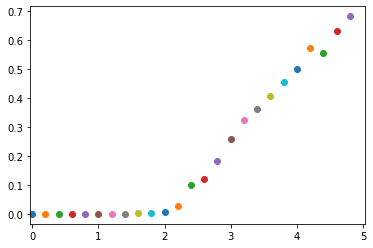

In [86]:
#State Evoluation (second version fix the chi)
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
mu = 0
sigma = 1
z = np.random.normal(mu,sigma,100) #sampling z
#initialize
k_t = 1
sigma_s2 = 1
sigma_t2 = 10
alpha = 1
lamb = 3
chi = 0.3
eps = 0.001
parameter_old = np.array([k_t,sigma_t2])
parameter_new = np.array([0,0])
iter_ = 0


def y_s(p,t):#using iteration to solve y^*
    eps = 0.001 #epsilon
    y_st = 1 #initial y^*
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps: #update until threshold met
            flag = False
            return y_new #return the solution
            break
        y_st = y_new

def F(p,t): #F function
    return y_s(p,t)/(np.sqrt(t))

def T(p,t): #T function
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def k_sigma(alpha):
    k_t = 1
    sigma_s2 = 1
    sigma_t2 = 10
    #alpha = 1
    lamb = 3
    chi = 0.3
    eps = 0.001
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([0,0])
    iter_ = 0
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        z = np.random.normal(mu,sigma,1000)
        sum_f = 0
        sum_f2 = 0
        for i in range(1000):
            sum_f +=F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z[i],chi)
            sum_f2 += F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z[i],chi)**2
        k_new = alpha*chi*sum_f/1000
        sigma_new = alpha*chi**2*sum_f2/1000
        parameter_new = np.array([k_new,sigma_new])
        k_t = k_new
        sigma_t2 = sigma_new
        iter_+=1
    return parameter_new
for alpha in np.arange(0.0,5.0,0.2):
    plt.scatter(alpha,k_sigma(alpha)[0])

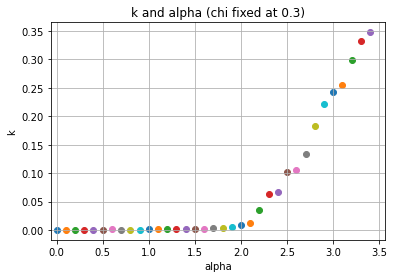

In [92]:
for alpha in np.arange(0.0,3.5,0.1):
    plt.scatter(alpha,k_sigma(alpha)[0])
plt.title("k and alpha (chi fixed at 0.3)")
plt.ylabel("k")
plt.xlabel("alpha")
plt.grid()
plt.show()